<a href="https://colab.research.google.com/github/AchmadWibawa/PCVK/blob/master/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection
Metode yang digunakan:

1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

## Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

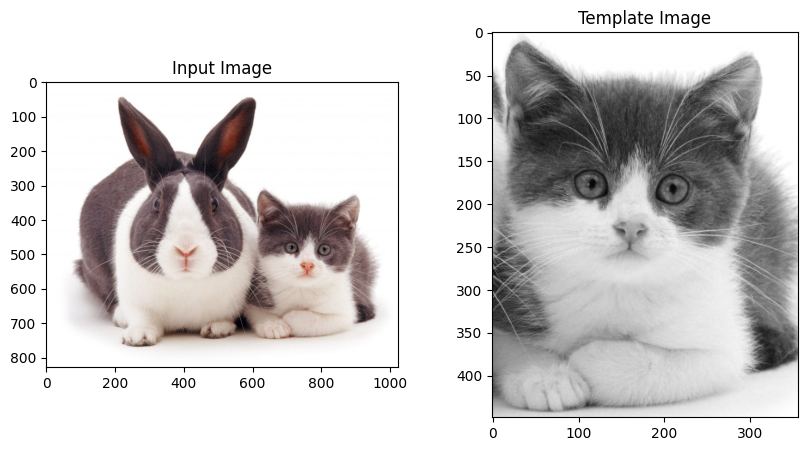

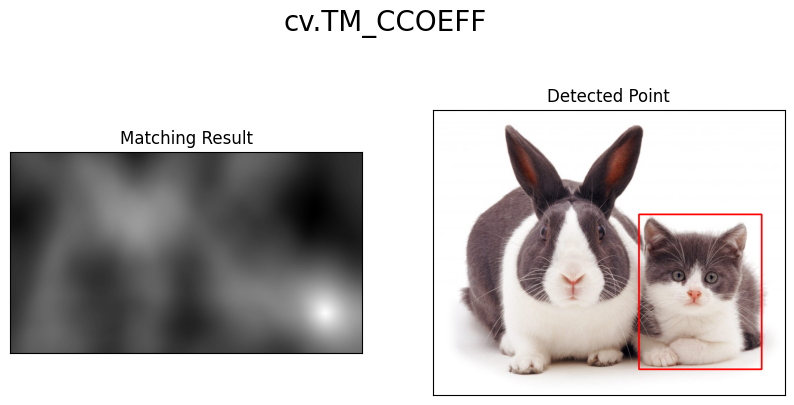

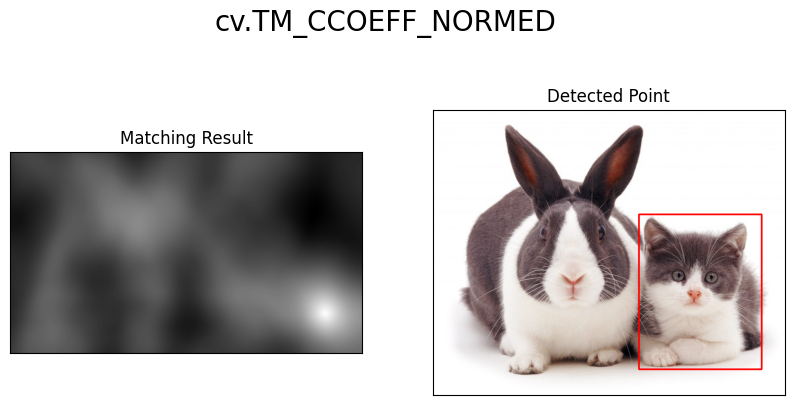

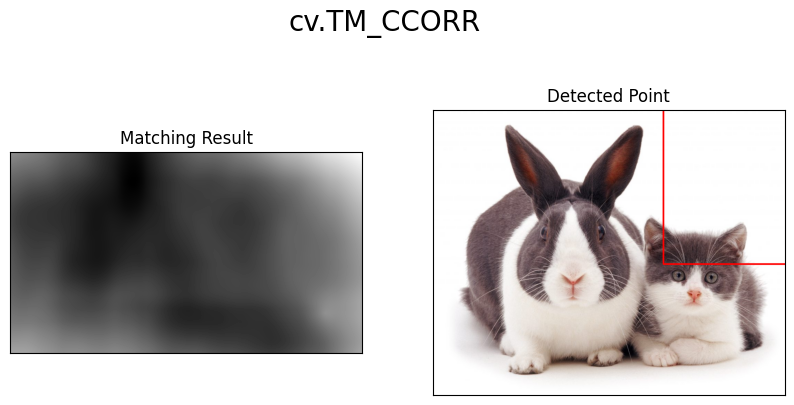

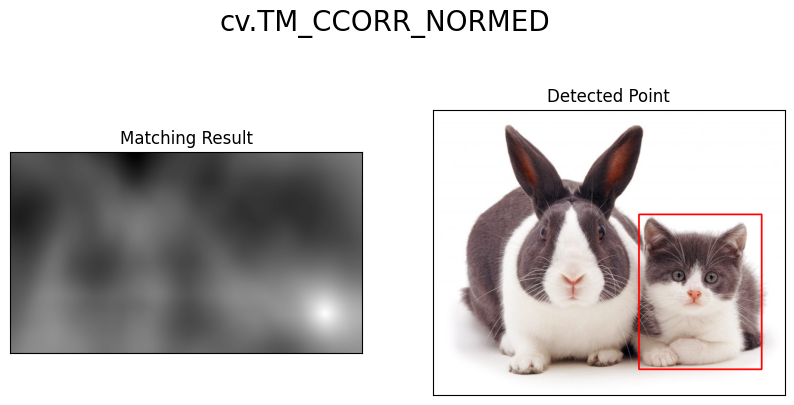

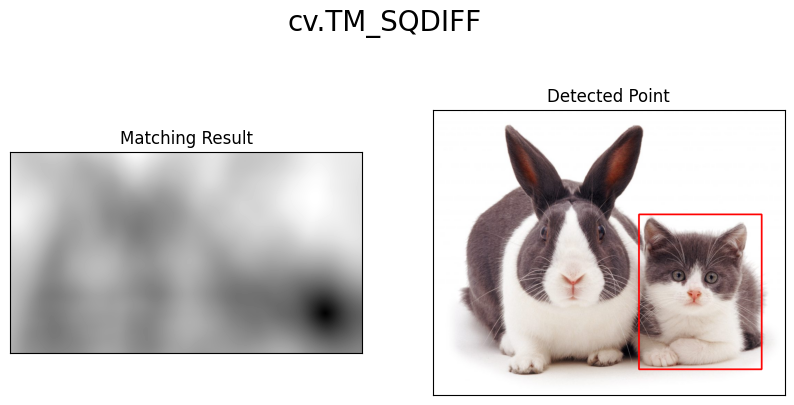

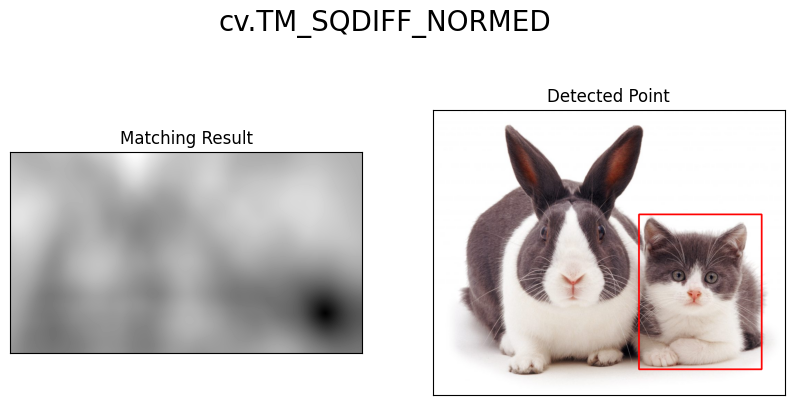

In [23]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
template = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/cat2_templatejpg.jpg', 0)
w, h = template.shape[::-1]

img2 = img.copy()
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

f, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axarr[0].set_title("Input Image")
axarr[1].imshow(template, cmap='gray')
axarr[1].set_title("Template Image")

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    res = cv.matchTemplate(img_gray, template, method)

    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img, top_left, bottom_right, (0, 0, 255), 3)

    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth, fontsize=20)
    plt.show()

## Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template.

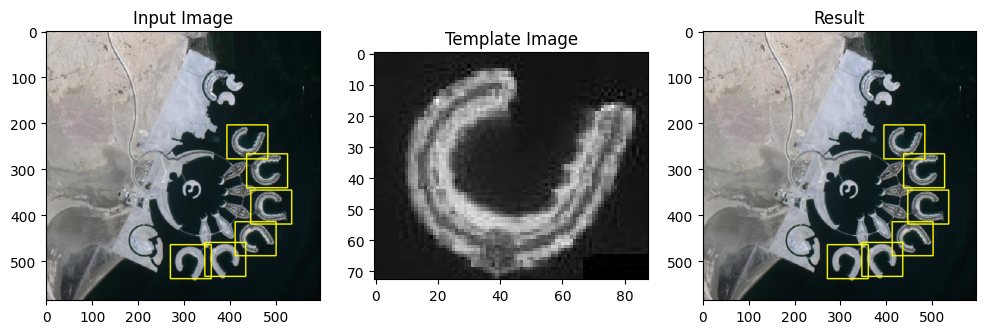

In [49]:
img3 = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain.jpg', cv.IMREAD_COLOR)
template2 = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain-template.jpg', cv.IMREAD_COLOR)
template_gray = cv.cvtColor(template2, cv.COLOR_BGR2GRAY)

method = cv.TM_CCOEFF_NORMED
threshold = 0.4

res = cv.matchTemplate(img3, template2, method)

while True:
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    if max_val < threshold:
        break

    h, w = template2.shape[:2]
    cv.rectangle(img3, max_loc, (max_loc[0]+w+1, max_loc[1]+h+1), (0, 255, 255), 2)

    start_row, end_row, start_col, end_col = max_loc[1]-h//2, max_loc[1]+h//2+1, max_loc[0]-w//2, max_loc[0]+w//2+1
    res[start_row:end_row, start_col:end_col] = 0

img3_rgb = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
ax[0].set_title('Input Image')
ax[0].axis('on')

ax[1].imshow(template_gray, cmap='gray')
ax[1].set_title('Template Image')
ax[1].axis('on')

ax[2].imshow(img3_rgb)
ax[2].set_title('Result')
ax[2].axis('on')

plt.show()

## Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg,

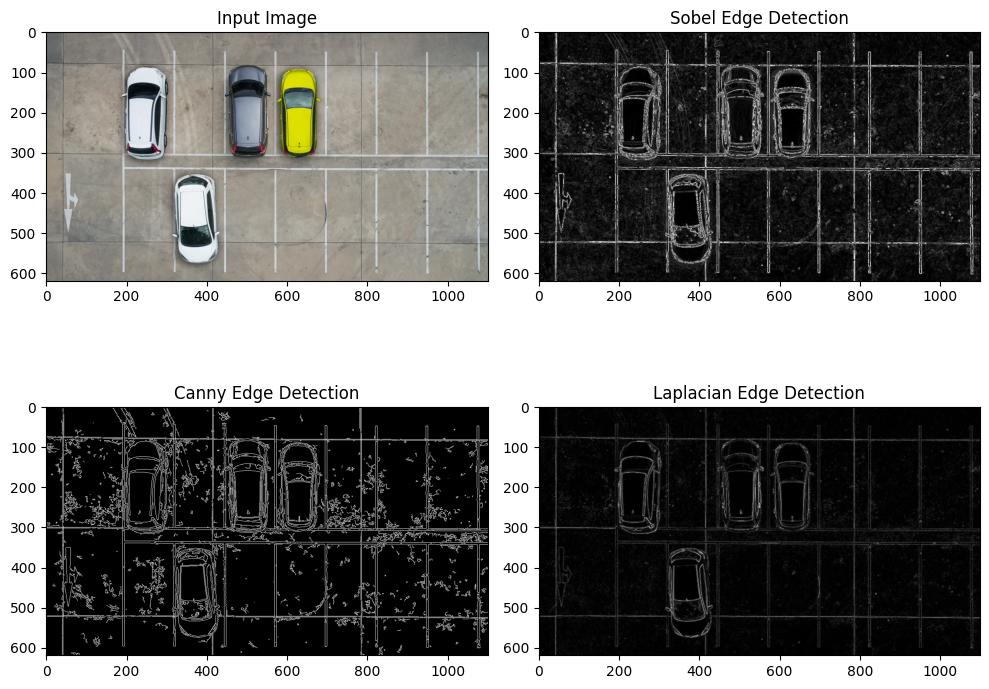

In [86]:
img4 = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/car-park.jpg', cv.IMREAD_COLOR)
img4_rgb = cv.cvtColor(img4, cv.COLOR_BGR2RGB)

img4_gray = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

sobel = np.sqrt(cv.Sobel(img4_gray, cv.CV_64F, 1, 0, ksize=3)**2 + cv.Sobel(img4_gray, cv.CV_64F, 0, 1, ksize=3)**2).astype(np.uint8)
canny = cv.Canny(img4_gray, threshold1=30, threshold2=100)
laplacian = cv.convertScaleAbs(cv.Laplacian(img4_gray, cv.CV_64F))

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax = axes.flatten()

ax[0].imshow(img4_rgb)
ax[0].set_title('Input Image')

ax[1].imshow(sobel, cmap='gray')
ax[1].set_title('Sobel Edge Detection')

ax[2].imshow(canny, cmap='gray')
ax[2].set_title('Canny Edge Detection')

ax[3].imshow(laplacian, cmap='gray')
ax[3].set_title('Laplacian Edge Detection')

for a in ax:
    a.axis('on')

plt.tight_layout()
plt.show()

## Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg,

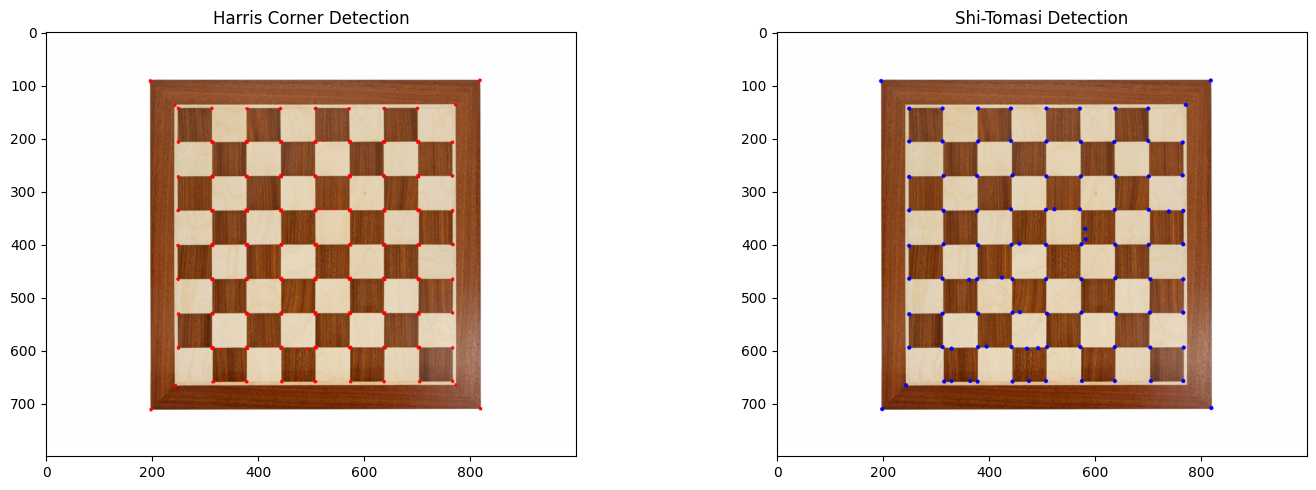

In [109]:
img5 = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/chess-board.jpg')
img5_gray = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

# harris corners detection
harris_corners = cv.cornerHarris(img5_gray, blockSize=4, ksize=3, k=0.04)
harris_corners = cv.dilate(harris_corners, None)
image_harris = cv.cvtColor(img5, cv.COLOR_BGR2RGB)
image_harris[harris_corners > 0.01 * harris_corners.max()] = [255, 0, 0]

# shi-thomasi detection
corners = cv.goodFeaturesToTrack(img5_gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)
image_shi_tomasi = cv.cvtColor(img5, cv.COLOR_BGR2RGB)
for corner in corners:
  x, y = corner.ravel()
  cv.circle(image_shi_tomasi, (x, y), 4, (0, 0, 255), -1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for i, (title, img5) in enumerate(zip(['Harris Corner Detection', 'Shi-Tomasi Detection'],
 [image_harris, image_shi_tomasi])):
  axes[i].imshow(img5)
  axes[i].set_title(title)
  axes[i].axis('on')

plt.tight_layout()
plt.show()

## Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg.

## Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg.